In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sc
from os import listdir

**A FAZER:**
- Ignorar dados que são 'Unknown' (arquivos que o nome começa com 'u')

- Aumentar o dataset:
    - Dividir cada arquivo em várias partes (janelamento)
    - Criar cópias de cada parte (janela) e adicionar um ruído diferente em cada uma de forma proporcial à sua amplitude

- Criar o dataframe
    - Gerar as features a partir de várias funções de agregação, onde cada uma será uma coluna do dataframe
    - Cada uma das partes (janelas) geradas anteriormente serão uma linha do dataframe

**Extra:** Pesquisar o significidado de cada uma das funções de agregação abaixo

Abaixo está um algoritmo que caminha por todos os arquivos dentro de um diretório e retorna o nome da sua pasta, o nome do arquivo e os seus dados de X e Y. Isso serve para poder iniciar as análises de forma mais automatizada.

Nome do arquivo: c_770_005.mat


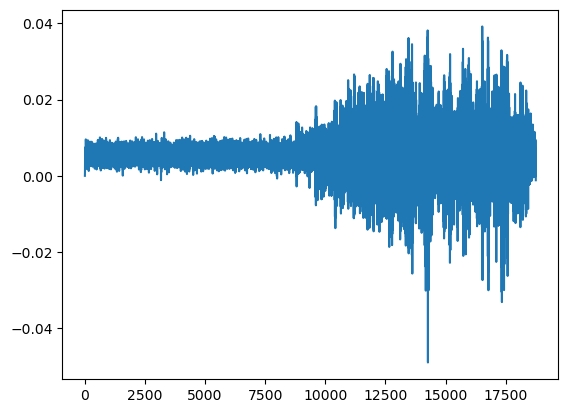

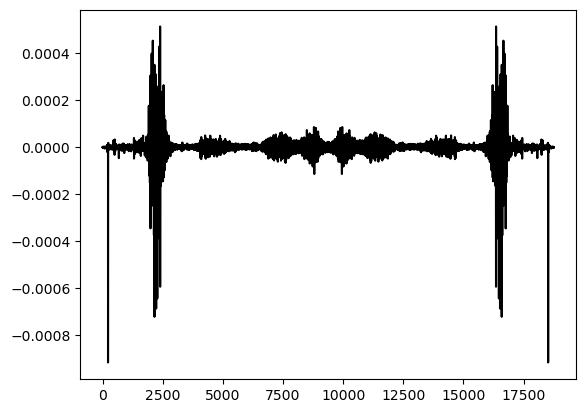

Nome do arquivo: c_570_015s.mat


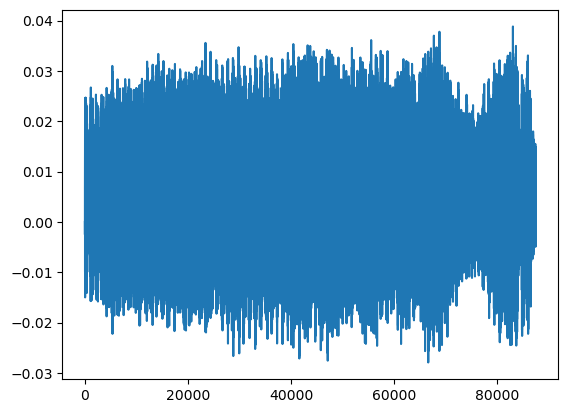

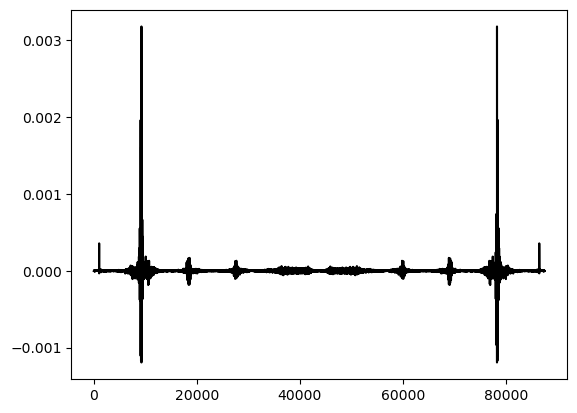

Nome do arquivo: c_570_014.mat


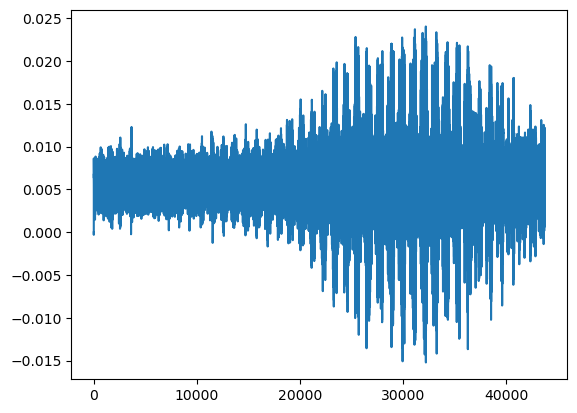

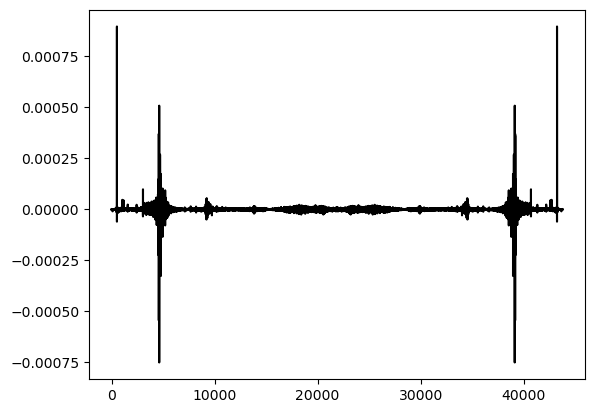

Nome do arquivo: c_570_040.mat


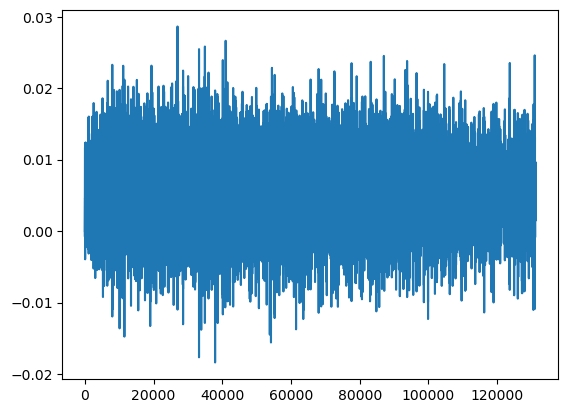

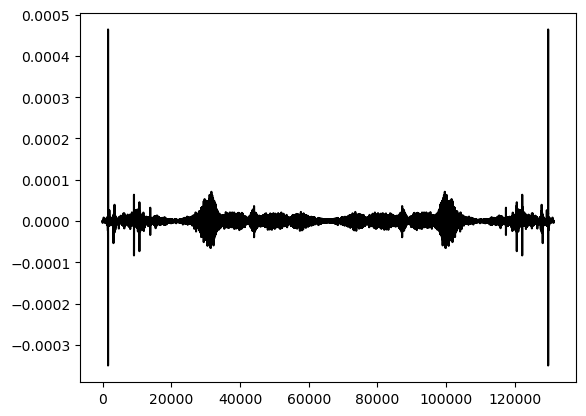

Nome do arquivo: c_570_035.mat


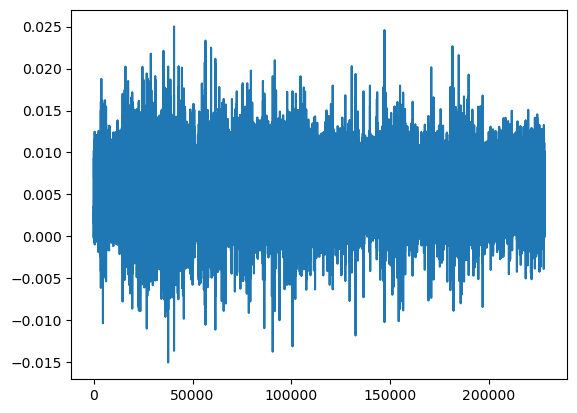

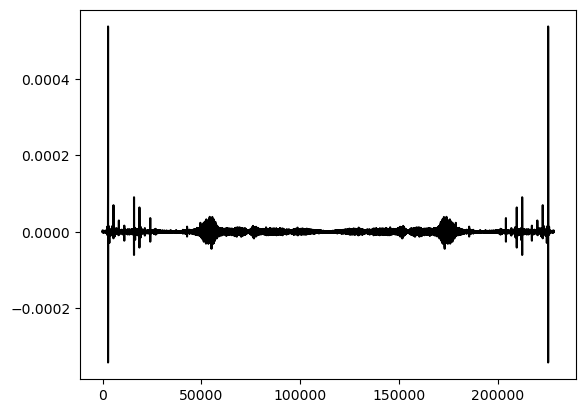

Nome do arquivo: c_1030_010.mat


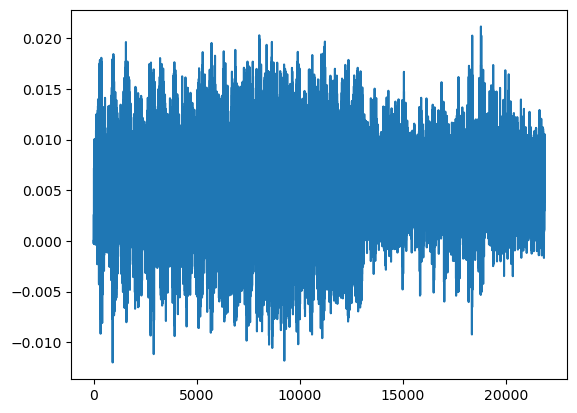

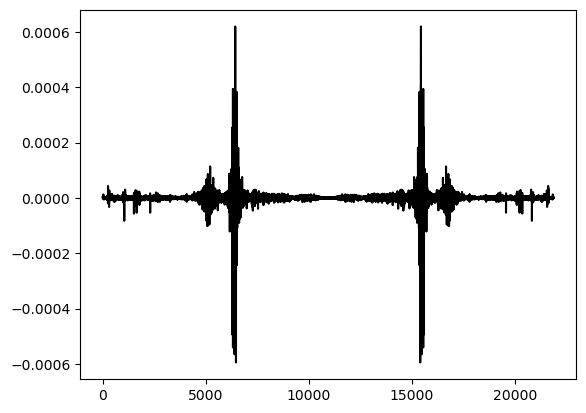

Nome do arquivo: c_1030_016.mat


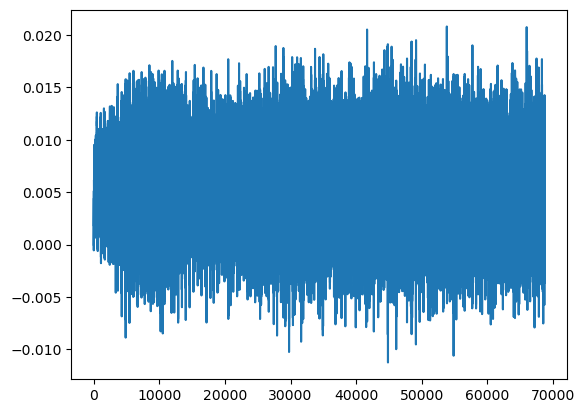

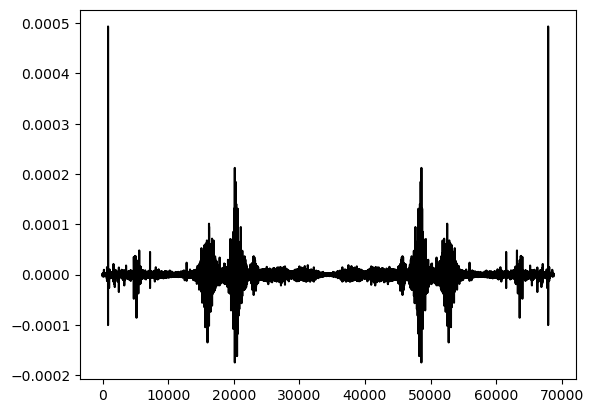

Nome do arquivo: c_1030_015.mat


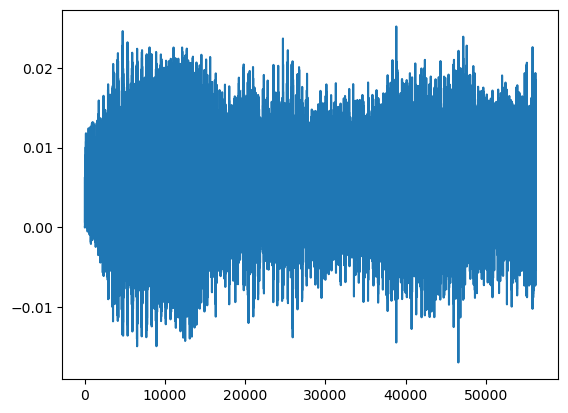

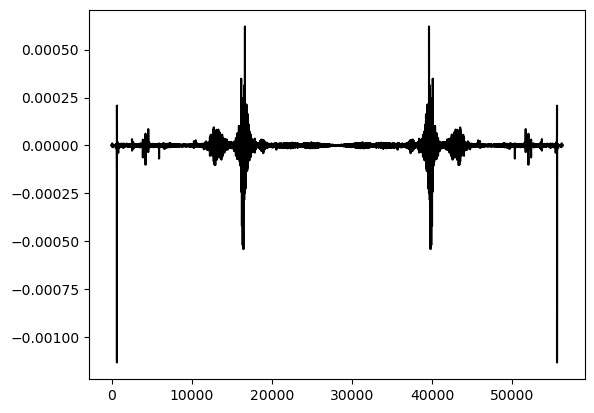

Nome do arquivo: c_770_005.mat


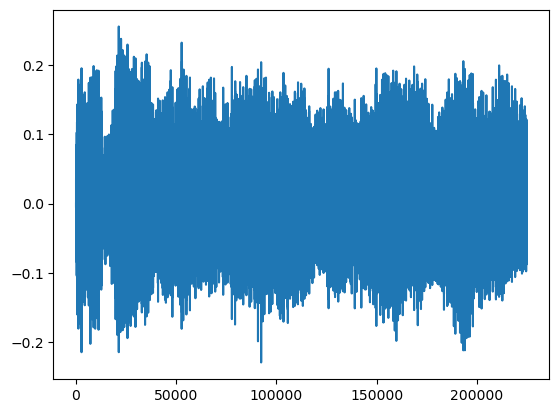

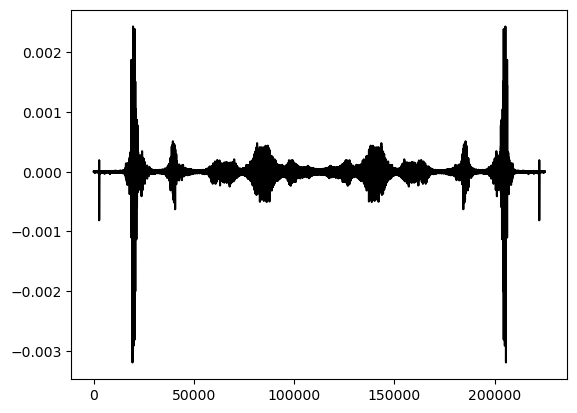

Nome do arquivo: c_570_010.mat


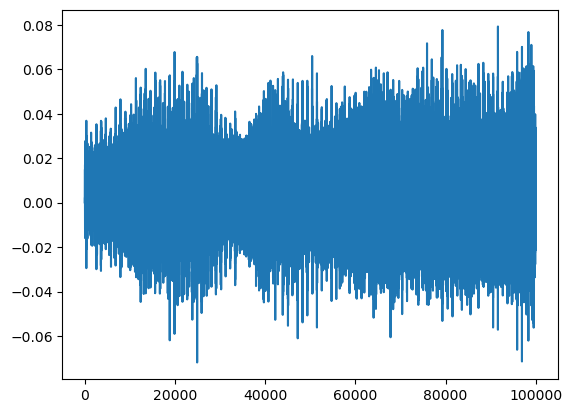

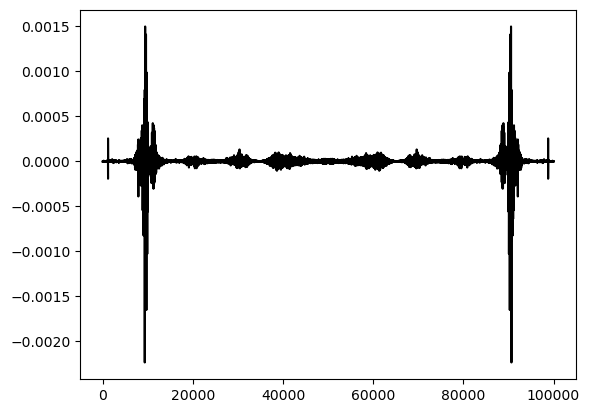

Nome do arquivo: c_570_001.mat


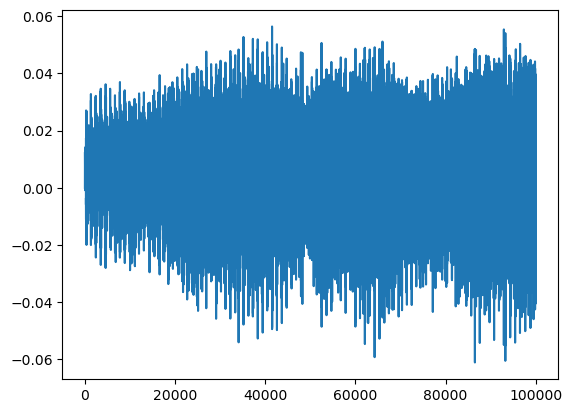

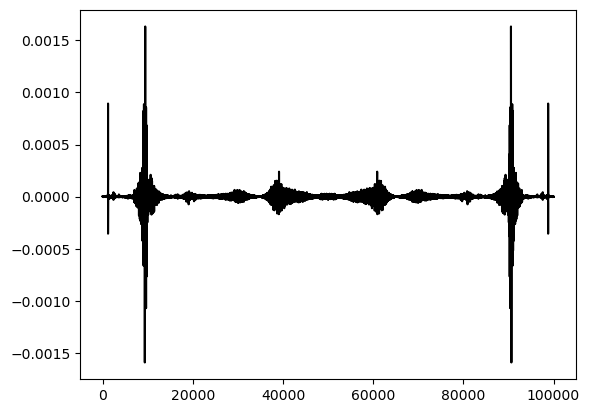

Nome do arquivo: c_770_002.mat


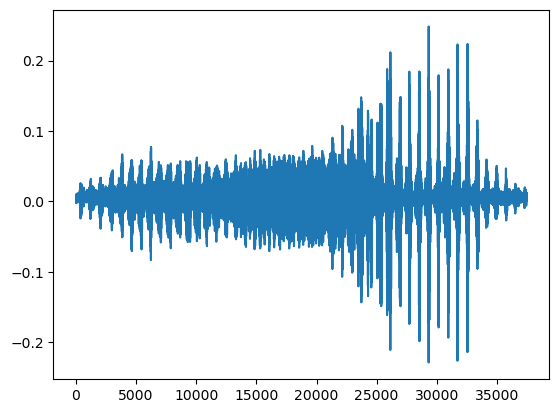

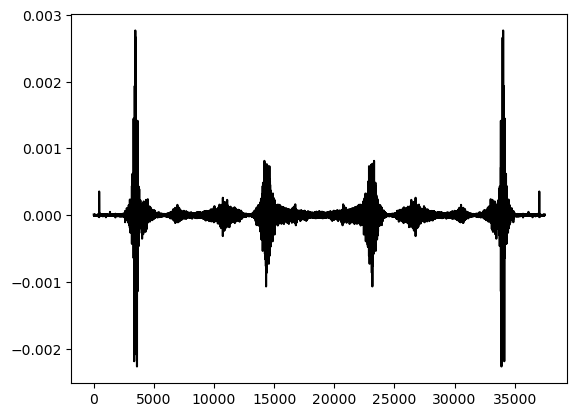

Nome do arquivo: c_570_005.mat


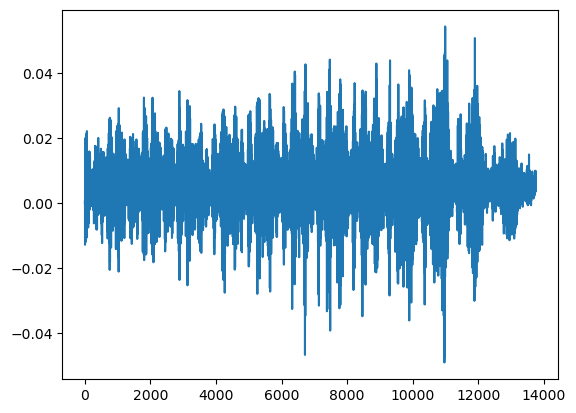

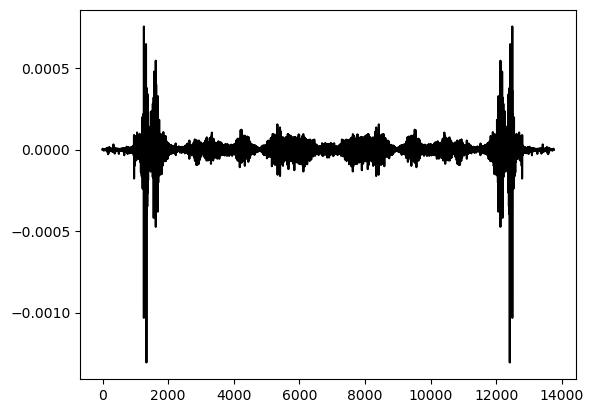

Nome do arquivo: c_425_025.mat


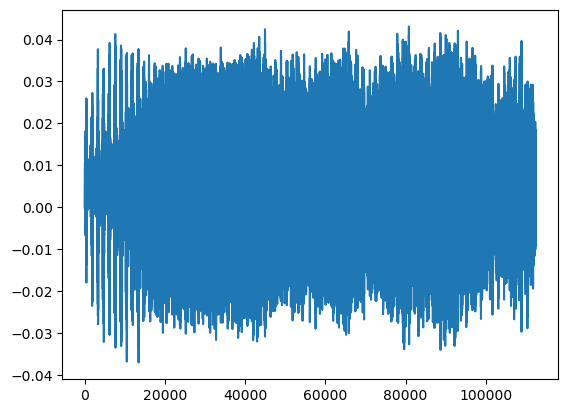

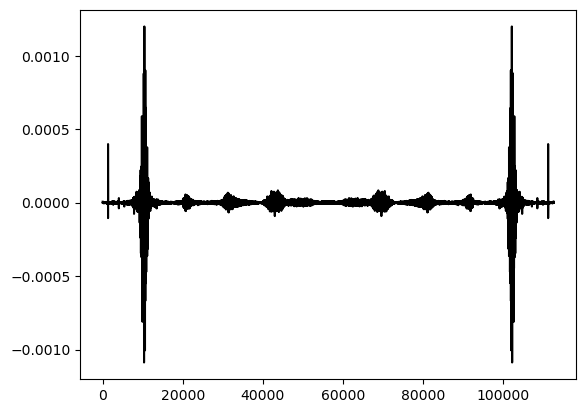

Nome do arquivo: c_770_002_2.mat


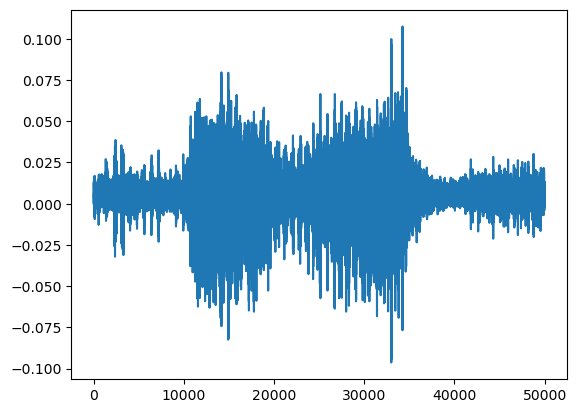

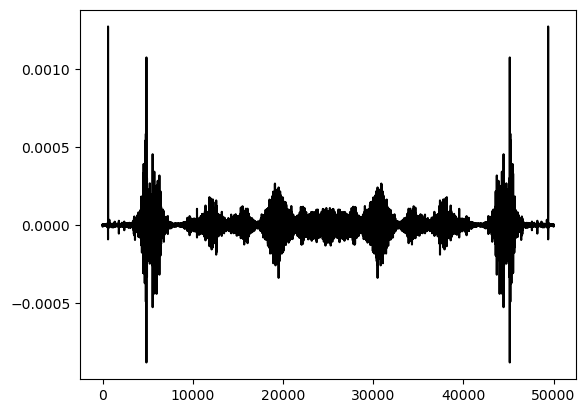

Nome do arquivo: c_770_001.mat


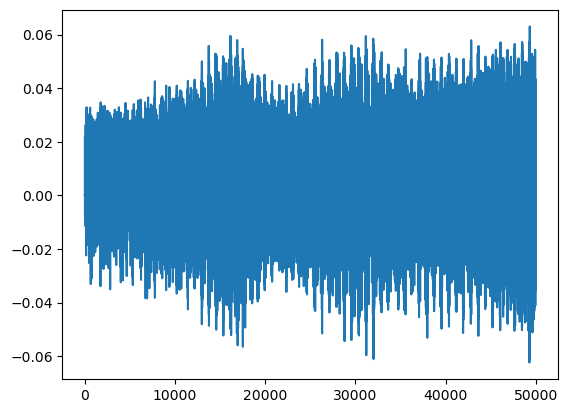

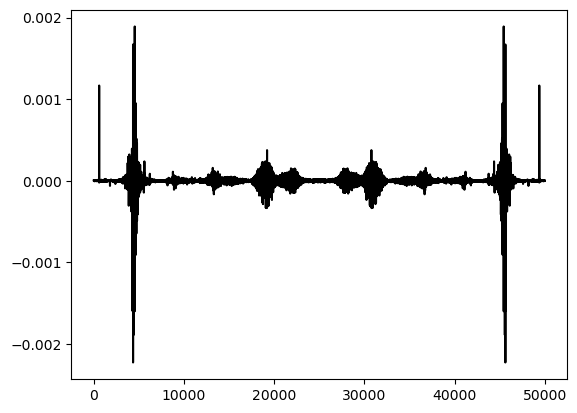

Nome do arquivo: c_570_002.mat


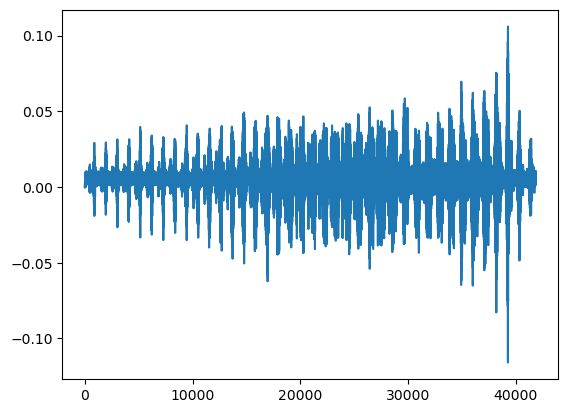

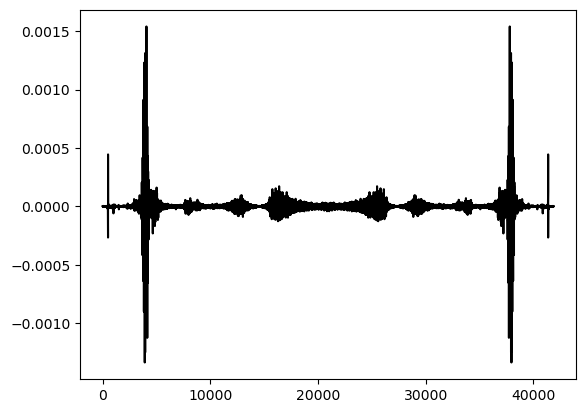

Nome do arquivo: c_770_010.mat


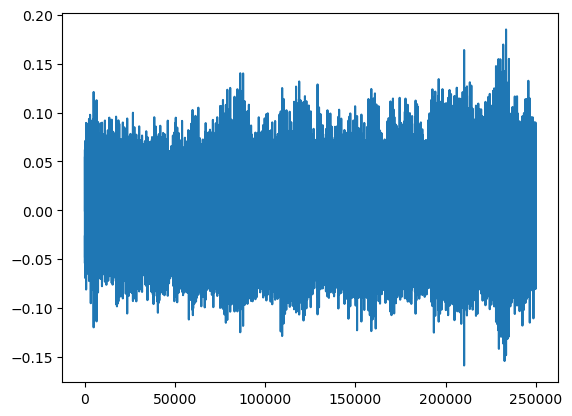

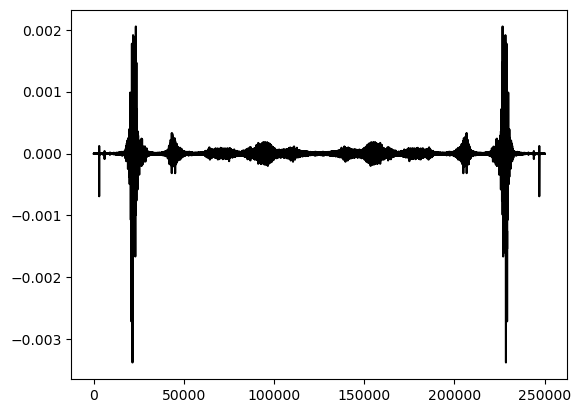

Nome do arquivo: c_320_005.mat


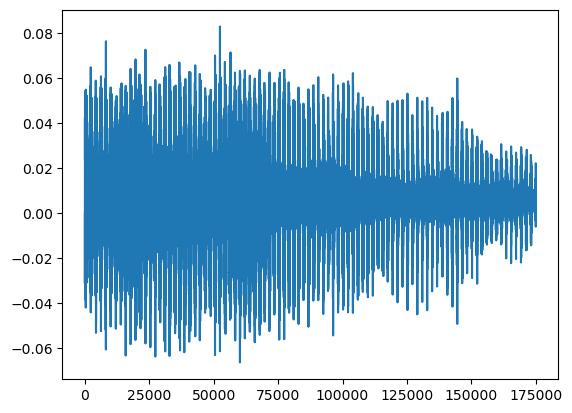

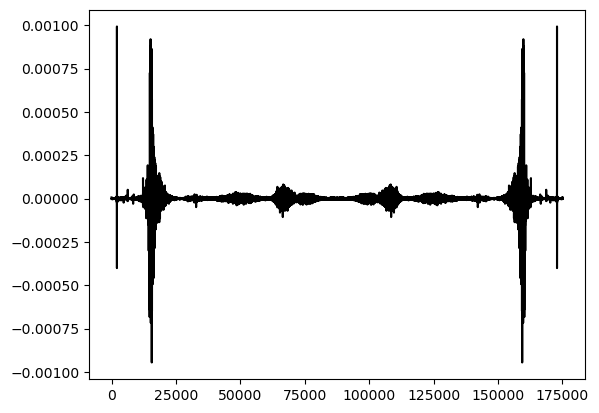

Nome do arquivo: c_425_020.mat


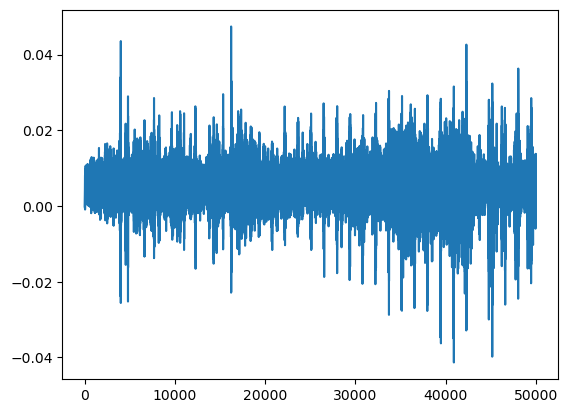

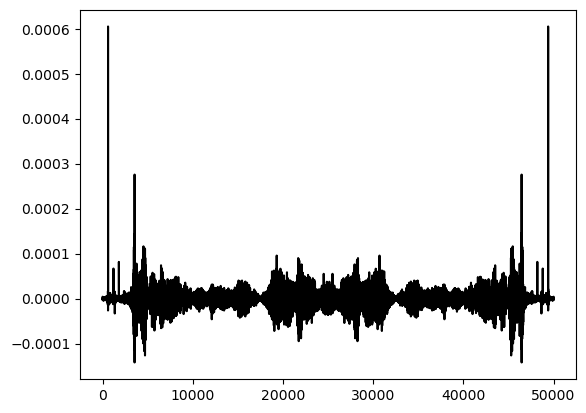

Nome do arquivo: c_770_015.mat


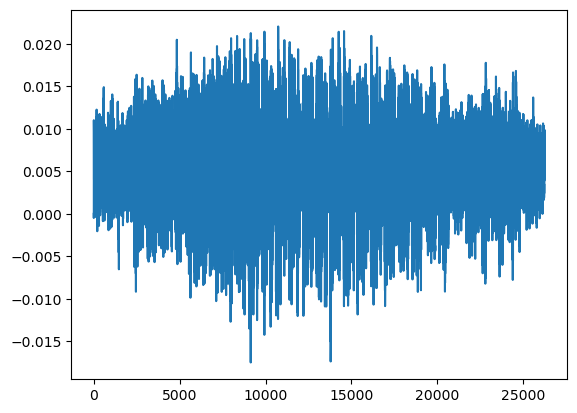

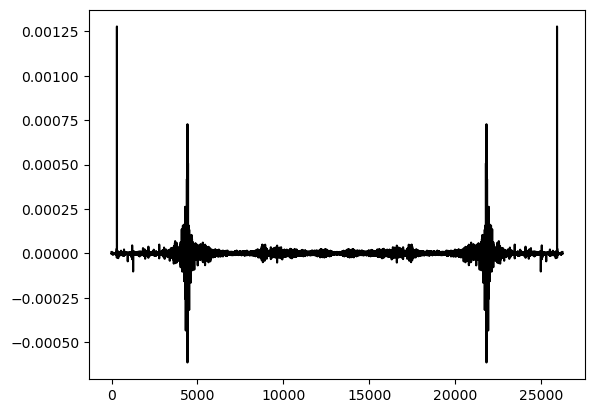

Nome do arquivo: c_1030_002.mat


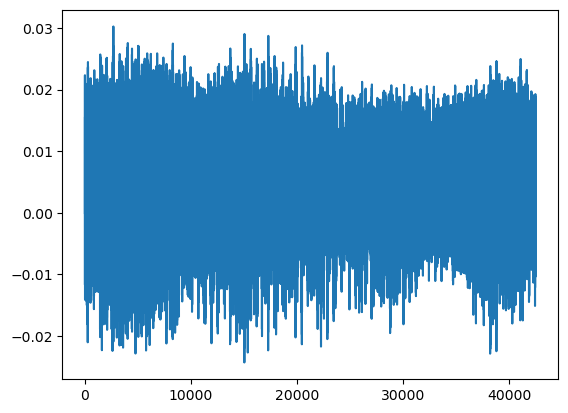

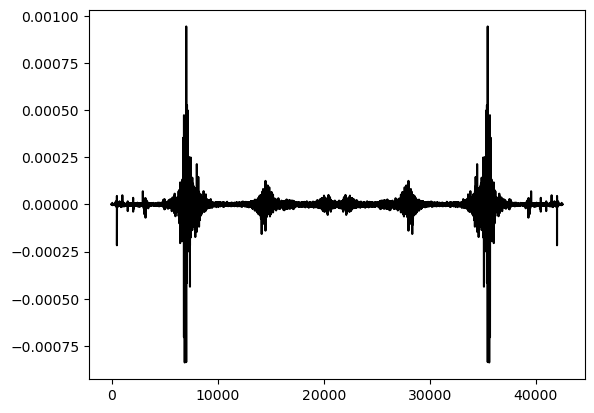

In [32]:
lista_de_pastas = listdir('cutting_tests_processed') # retorna uma lista com os nomes das pastas dentro de "cutting_tests_processed"
for pasta in lista_de_pastas:
    lista_de_arquivos = listdir(f'cutting_tests_processed/{pasta}') # retorna uma lista com os nomes dos arquivos dentro de uma pasta de "cutting_tests_processed"
    for arquivo in lista_de_arquivos:
        data = sc.loadmat(f'cutting_tests_processed/{pasta}/{arquivo}') # ler arquivo .mat
        x = data['tsDS'][:, 0] # extrair informações do eixo X 
        y = data['tsDS'][:, 1] # extrair informações do eixo Y
        if arquivo[0] == 'c':
            print("Nome do arquivo:", arquivo)
            plt.plot(y)
            plt.show()
            fft = np.fft.fft(y)/len(y)
            plt.plot(fft[1:], 'k')
            plt.show()
#             print("Nome da pasta:", pasta)
#             print("x =", x)
#             print("y =", y)
#             print("")
        

# Exemplos de Funções de Agregação

## Domínio do tempo:

### Média ($\mu_x$)

$$\mu_x = \frac{1}{N}\sum_{i=0}^{N} x_i$$

### Desvio Padrão ($\sigma_x$)

$$\sigma_x^2 = \frac{1}{N}\sum_{i=0}^{N} (x_i - \mu_x)^2$$

### Curtose ($\kappa_x$)

$$\kappa_x = \frac{1}{N}\sum_{i=0}^{N} \Bigg(\frac{x_i - \mu_x}{\sigma_x}\Bigg)^4$$

### Distorção ($\gamma_x$)

$$\gamma_x = \frac{1}{N}\sum_{i=0}^{N} \Bigg(\frac{x_i - \mu_x}{\sigma_x}\Bigg)^3$$

### Amplitude Pico a Pico ($x_{ppv}$)

$$x_{ppv} = max(x_i) - min(x_i)$$

### Valor Quadrático Médio ($x_{rms}$)

$$x_{rms} = \Bigg(\frac{1}{N}\sum_{i=0}^{N} x_i^2\Bigg)^{1/2} $$

### Raiz Quadrada da Amplitude ($x_{sra}$)

$$x_{sra} = \Bigg(\frac{1}{N}\sum_{i=0}^{N} \sqrt{\left |x_i  \right |}\Bigg)^2$$

### Fator de Crista ($x_{cf}$)

$$x_{cf} = \frac{max(\left | x_i \right |)}{x_{rms}}$$

### Fator de Impulso ($x_{if}$)

$$x_{if} = \frac{max(\left | x_i \right |)}{\frac{1}{N}\sum_{i=0}^{N} \left |x_i  \right |}$$

### Fator de Margem ($x_{mf}$)

$$x_{mf} = \frac{max(\left | x_i \right |)}{x_{sra}}$$

### Fator de Curtose ($x_{kf}$)

$$x_{kf} = \frac{\kappa_x}{x_{rms}^4}$$


## Domínio da Frequência:

### Média ($\mu_x$)

$$\mu_X = \frac{1}{N}\sum_{i=0}^{N} X_i$$

### Desvio Padrão ($\sigma_x$)

$$\sigma_X^2 = \frac{1}{N}\sum_{i=0}^{N} (X_i - \mu_X)^2$$

### Valor Quadrático Médio ($x_{rms}$)

$$x_{rms} = \Bigg(\frac{1}{N}\sum_{i=0}^{N} X_i^2\Bigg)^{1/2} $$

### Valor de Pico

$$max(X)$$

### Frequência do Pico

$$f \space para \space quando \space max(X) \space é \space verdadeiro $$

## Categorias:

### Label 1

Nome da pasta

### Label 2

Primeira letra do nome do arquivo

In [26]:
y = np.array([[2, 6, 9], [1, 7, 10]])


a = {'Experimento': [],
     'y_med': [],
     'y_std': [],
     'y_rms': []}


for i in y:
    a['Experimento'].append(i[1])
    a['y_med'].append(i.mean())
    a['y_std'].append(i.std())
    a['y_rms'].append(np.sqrt(np.mean(i**2)))


dataframe = pd.DataFrame(a)
dataframe



,Experimento,y_med,y_std,y_rms
0,6,5.666667,2.867442,6.350853
1,7,6.000000,3.741657,7.071068
